## Introduction 

This Kaggle notebook presents a comprehensive case for exploring the data, and deriving valuable insights.

### Purpose of the Analysis

In the ever-changing world of data careers, knowing job roles and salary trends is vital for professionals planning their careers. This study looks at job types, where companies are located, experience levels, and average salaries. It aims to help beginners in data-related fields plan their career paths better.


The data is located at [ai-jobs.net](https://ai-jobs.net/salaries/2023/) and entitled "The Global AI, ML, Data Science Salary Index for 2023" which is based on internal data survey submissions and jobs with open salaries. The dataset is updated every week. You can contribute to them by submitting your salary info. The project collects salary information anonymously from professionals and employers all over the world and make it publicly available for anyone to use, share and play around with. The data set contains a single table with the following columns:

  * **`work_year `**: The year in which the data was recorded.
  * **`job_title`**: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'.
  * **`job_category`**: A classification of the job role into broader categories for easier analysis.
  * **`salary_currency`**: The currency in which the salary is paid, such as USS and EUR.
  * **`salary`**: The annual gross salary of the role in the local currency.
  * **`salary_in_usd`**: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.
  * **`employee_residence`**: The country of residence of the employee.
  * **`experience_level`**: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive'.
  * **`employment_type`**: Specifies the type of employment, such as 'Full-time', 'Part-time', and 'Contract'.
  * **`work_setting`**: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'.
  * **`company_location`**: The country where the company is located.
  * **`company_size`**: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes.


* Importing the Python library: 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load the data
data = pd.read_csv("jobs_in_data.csv")

# Return the first rows
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
# Use the info() function to show a description/preview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


* The data set contains 9,355 rows and 12 columns. It is **reliable** , original, comprehensive, and it contains all the critical information needed to answer the business task.

#### Data cleaning

Count the number of duplicates.

In [4]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()

# Print the number of duplicates
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 4014


I have decided **not** to remove the duplicates, because it seems they do not represent duplicates but different entries from the survey which had the same responses. The duplicates make sense since a specific position/role might have the same work setting and salary in a certain country.

Couting the empty values for each column (attribute)

In [5]:
# summarizing the number of empty values for each column
data.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

The data set has no empty values.

#### Investigate the variables distribution. 
It is important to check the variables balance because it affects the statistics regarding the target variable (salary)

In [6]:
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [7]:
# Calculate the frequency and proportion of each unique value in the "work_year" column
data_work = data['work_year'].value_counts().reset_index()
data_work.columns = ['work_year', 'count']
data_work = data_work.sort_values(by='count', ascending=False)
data_work['proportion (%)'] = round(data_work['count'] / len(data) * 100, 1)

# Print the result
data_work

,work_year,count,proportion (%)
0,2023,7453,79.7
1,2022,1634,17.5
2,2021,197,2.1
3,2020,71,0.8


#### Find diffrent 'job_category' under 'Data Science and Research' job_title

In [8]:
# Filter the DataFrame for 'Data Science and Research' job_category
data_science_df = data[data['job_category'] == 'Data Science and Research']

# Count the frequency for each 'job_title'
data_science = data_science_df['job_title'].value_counts().reset_index()
data_science.columns = ['job_title', 'frequency']
data_science['proportion (%)'] = round(data_science['frequency'] / len(data) * 100, 2)

# Print the DataFrame
data_science


,job_title,frequency,proportion (%)
0,Data Scientist,1989,21.26
1,Applied Scientist,272,2.91
2,Research Scientist,269,2.88
3,Research Engineer,144,1.54
4,Data Science Manager,88,0.94
5,Data Science Consultant,44,0.47
6,Research Analyst,39,0.42
7,Decision Scientist,38,0.41
8,Director of Data Science,29,0.31
9,Data Science Lead,20,0.21


The table presented above shows that the 'Data Science and Researcher' category have 23 different job_titles

#### Analyzing the experience_level: unique values and frequency

In [9]:
# Define the order of experience levels with proportion

exp_level = data['experience_level'].value_counts().reset_index()
exp_level = exp_level.sort_values(by='experience_level', ascending=True)
exp_level.columns = ['experience_level', 'frequency']
exp_level['proportion (%)'] = round(exp_level['frequency'] / len(data) * 100, 1)
exp_level.sort_index()


,experience_level,frequency,proportion (%)
0,Senior,6709,71.7
1,Mid-level,1869,20.0
2,Entry-level,496,5.3
3,Executive,281,3.0


According to the table provided, the majority of employees in the database are labeled as "Senior," accounting for 71.7% of the total. In contrast, only a small percentage of employees are classified as "Entry-level," representing just 5.3% of the total. This raises the question of why there is such an imbalance between the number of "Seniors" and other levels. Further investigation is necessary to determine if this proportion accurately reflects the actual scenario..


#### Analyzing the employment_type: unique values and frequency

In [10]:
# Count the frequency for each 'employment_type' with proportion
empl_type = data['employment_type'].value_counts().reset_index()
empl_type.columns = ['employment_type', 'frequency']
empl_type['proportion (%)'] = round(empl_type['frequency'] / len(data) * 100, 2)
empl_type

,employment_type,frequency,proportion (%)
0,Full-time,9310,99.52
1,Contract,19,0.20
2,Part-time,15,0.16
3,Freelance,11,0.12


#### The top 10 company_location by frequency

In [11]:
# Create a summary table showing top 10 company location
com_loc = data['company_location'].value_counts().reset_index()
com_loc.columns = ['company_location', 'frequency']
com_loc['proportion (%)'] = round(com_loc['frequency'] / len(data) * 100, 1)
com_loc.head(10)

,company_location,frequency,proportion (%)
0,United States,8132,86.9
1,United Kingdom,449,4.8
2,Canada,226,2.4
3,Spain,113,1.2
4,Germany,72,0.8
5,France,50,0.5
6,Australia,24,0.3
7,Portugal,24,0.3
8,Netherlands,21,0.2
9,Brazil,17,0.2


The table above shows that 86.8% of total companies are located in the United States.

In [12]:
fea = ['company_size','work_setting']

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

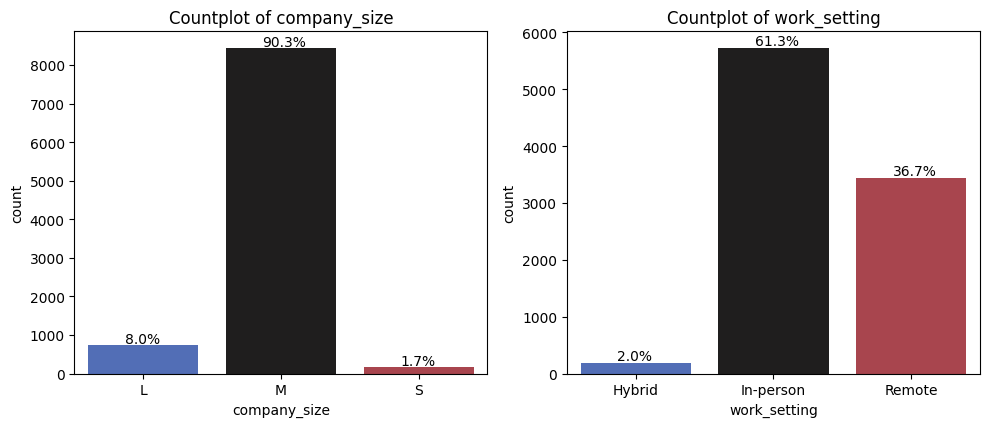

In [14]:
fig, axes =plt.subplots(10,2,figsize=(10,40))
plt.subplots_adjust(wspace=0.9, hspace=0.9)
i=0
total = len(data['work_year']) 

for fea_name in fea:
     ax= axes[i//2, i%2]
     i += 1
     sns.countplot(x=fea_name, data=data, ax=ax,palette='icefire' )
     ax.set_title(f'Countplot of {fea_name}')
    #  ax.tick_params(axis='x', rotation=45)

for i in range(len(fea), 10 * 2):
    fig.delaxes(axes[i//2, i%2])
for ax in axes.flat:
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width()/3
        y = p.get_y() + p.get_height()+50
        ax.annotate(percentage, (x, y))

plt.tight_layout()
plt.show()

The table presented above shows that the medium company size "M" covers 90% of the entries. In regards to work_setting, the most popular still is 'In-person' covering 61% of the total, followed by 'Remote' with 36.7%. Overall, the combination (subgroup) 'M' AND 'In-person' has 5.314 rows, repreenting 56.8% of the total entries.

In [15]:
val=data.groupby(["work_year","experience_level"])["salary"].mean().reset_index()


df = px.data.gapminder().query("continent == 'Oceania'")

fig = px.line(val, 
              x='work_year',
              y='salary',
              color='experience_level')
fig.show()

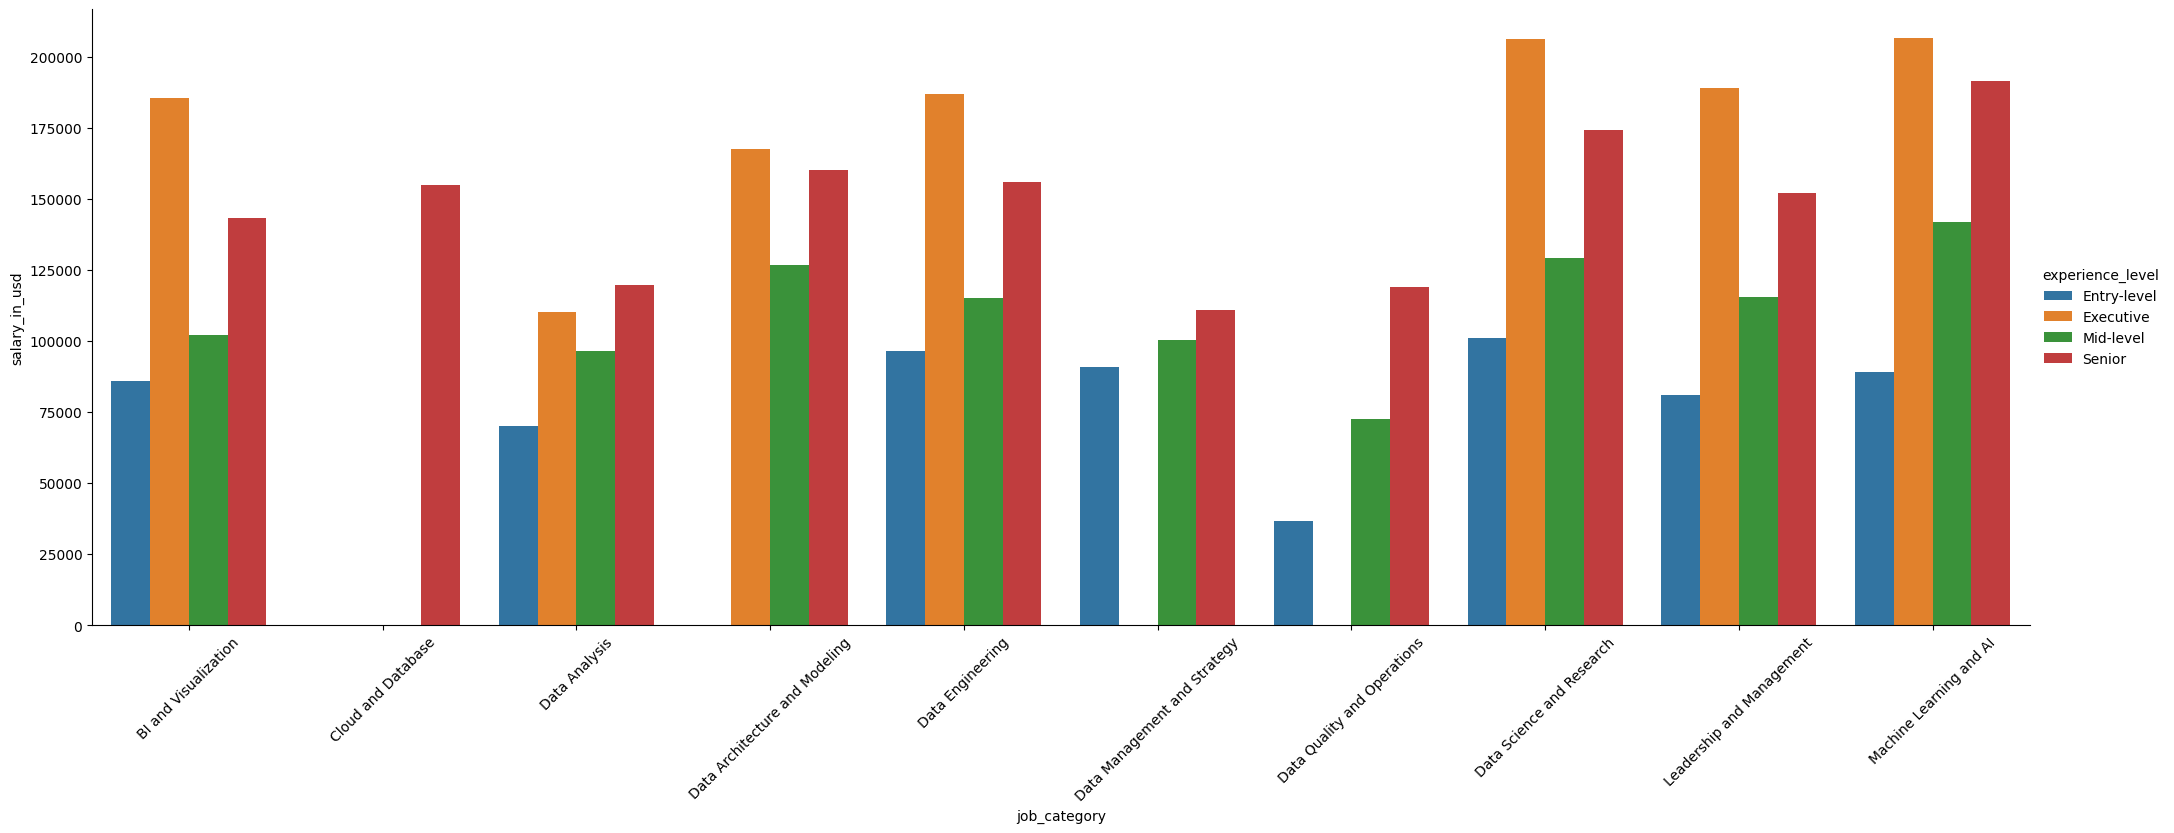

In [16]:
mean_df = data.groupby(['job_category','experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(25, 8))
ax = sns.barplot(x='job_category', y='salary_in_usd', hue='experience_level', data=mean_df)
ax.spines[['top', 'right']].set_visible(False)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.xticks(rotation=45)
plt.show()



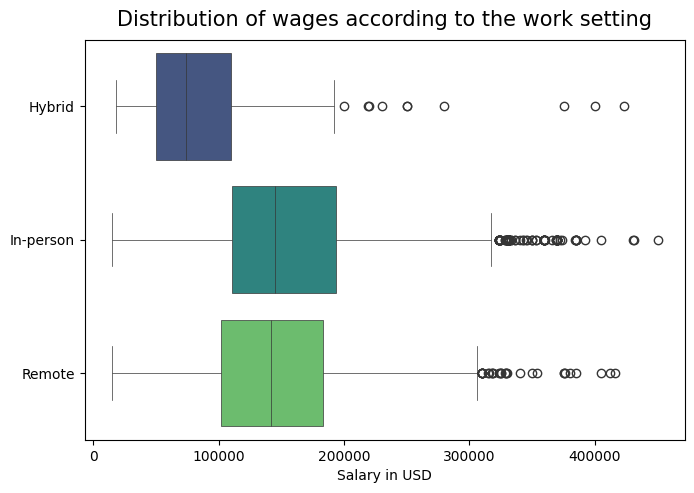

In [17]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data = data, x = 'salary_in_usd',
            y = 'work_setting',
            palette = 'viridis',
            linewidth = 0.5)
ax.set_title('Distribution of wages according to the work setting',
             fontsize = 15,
             pad = 10)
ax.set_xlabel('Salary in USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

Check out the boxplot above. It's quite interesting to see that the majority of hybrid jobs tend to get paid less than their In-person and Remote roles, with a whopping 75% of them falling into this category! 

#### Analyzing the overal salary_in_usd distribution

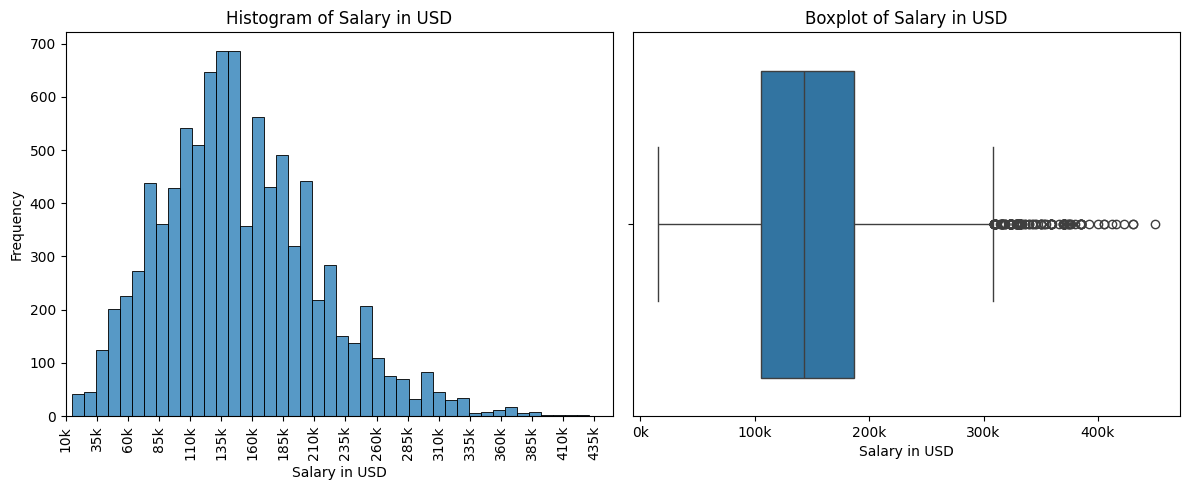

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=data, x='salary_in_usd', bins=45, ax=ax1)
ax1.set_xlim(15000, 450001)
ax1.set_title('Histogram of Salary in USD')
ax1.set_xlabel('Salary in USD')
ax1.set_ylabel('Frequency')

formatter = FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000))
ax1.xaxis.set_major_formatter(formatter)
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xticks(range(10000, 450001, 25000))
ax1.set_yticks(range(0, 701, 100))

sns.boxplot(data=data, x='salary_in_usd', ax=ax2)
ax2.set_title('Boxplot of Salary in USD')
ax2.set_xlabel('Salary in USD')
ax2.set_ylabel('')
formatter = FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000))
ax2.xaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.show()

The histogram indicates a slight right skew, but it still resembles a bell shape, suggesting that the salary_in_usd distribution is approximately normal. Recognizing this normal distribution is crucial for advanced statistical techniques like hypothesis testing and regression analysis. Knowing where your data falls on a normal distribution helps identify outliers, which are values more than 3 standard deviations away from the mean. Identifying outliers is essential as extreme values could stem from errors in data collection or processing, potentially distorting your findings.

The above graph mean salary of 'Data Science and Research subgroup' as it represents the scope of the business task.

In [19]:
# Sort the DataFrame by 'experience_level'
data= data.sort_values(by='experience_level', ascending=True)

# Create an interactive strip plot with jitter
fig = px.strip(data, x='job_category', y='salary_in_usd', color='experience_level', hover_data=['company_location', 'job_title', 'employment_type', 'work_setting', 'company_size'], title='Salary vs Job Category')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=45)

# Update the size and shape of the data points
fig.update_traces(marker=dict(size=5, opacity=0.6))

# Update axis titles and legend title
fig.update_layout(xaxis_title='Job Category',
                  yaxis_title='Salary in USD',
                  legend_title='Experience Level')

# Increase resolution and height
fig.update_layout(width=800, height=600)

# Show the plot
fig.show()

In [20]:
# Filtering the DataFrame for 'Data Analysis' category AND 'Entry-level' experience level
data_science_entry = data[(data['job_category'] == 'Data Science and Research') & (data['experience_level'] == 'Entry-level')]

# Grouping by 'company_location' and calculating the average salary
summary_table = data_science_entry.groupby('company_location')['salary_in_usd'].mean().round().reset_index()

# Renaming the columns as per your R code
summary_table = summary_table.rename(columns={'salary_in_usd': 'avg_salary_entry_level'})

# Print the summary table
# print(summary_table)

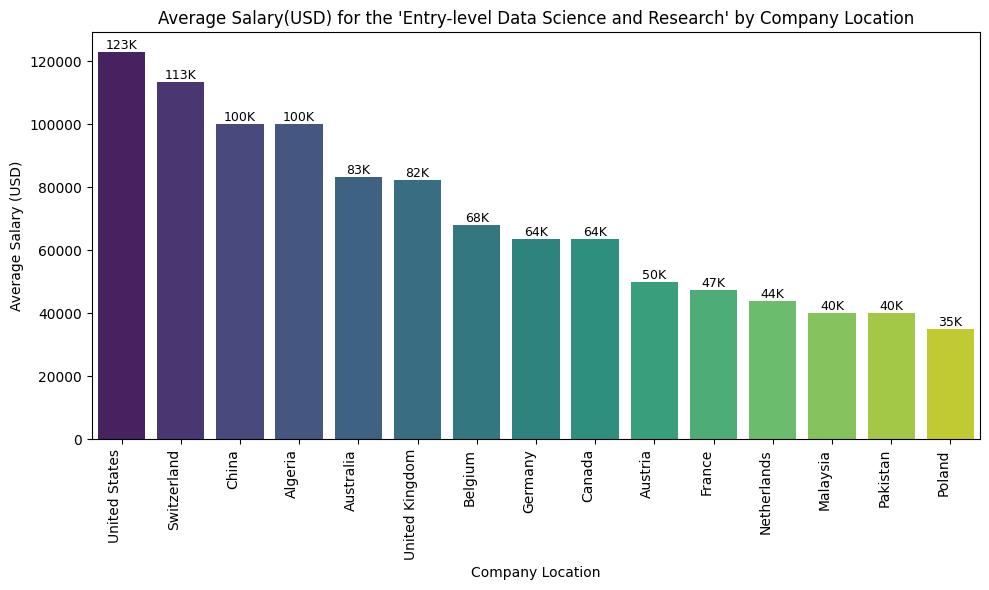

In [21]:
summary_table_sorted = summary_table.sort_values(by='avg_salary_entry_level', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=summary_table_sorted[0:15], x='company_location', y='avg_salary_entry_level', palette='viridis',legend=False)

# Annotate each bar with the average salary in thousands (k)
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1000:.0f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9, color='black')

# Customize plot elements
plt.title("Average Salary(USD) for the 'Entry-level Data Science and Research' by Company Location")
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

The above graph shows'Entry-level Data Science and Research subgroup' as it represents the scope of the business task.

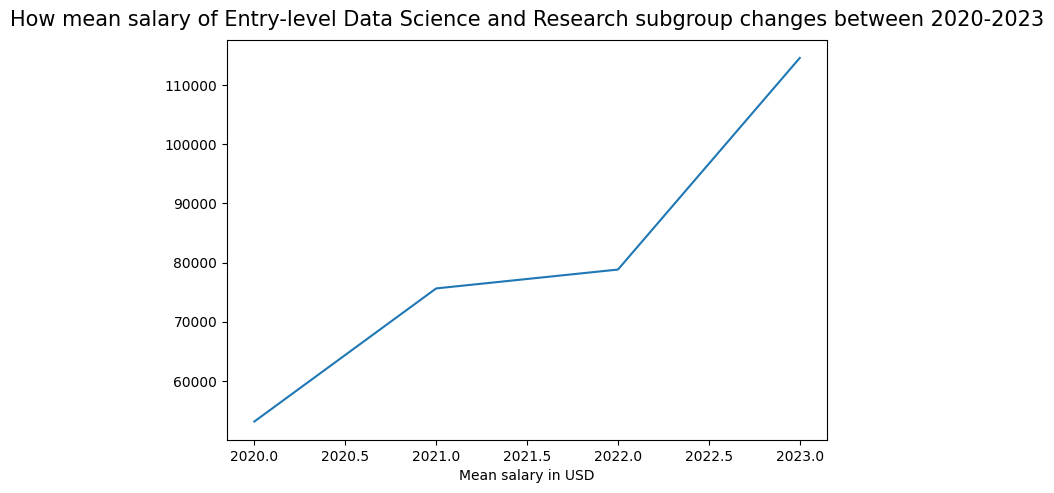

In [22]:
mean_salary = data_science_entry.groupby('work_year')['salary_in_usd'].mean()
mean_salary = pd.DataFrame({'work_year': mean_salary.index, 'mean_salary(usd)': mean_salary.values})

fig = plt.figure(figsize = (6, 4))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(data = mean_salary,
             y = 'mean_salary(usd)',
             x = 'work_year')
ax.set_title('How mean salary of Entry-level Data Science and Research subgroup changes between 2020-2023',
             fontsize = 15, pad = 10)
ax.set_xlabel('Mean salary in USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

The above graph shows how average salary chnges between year 2020 -2023 for the'Entry-level Data Science and Research subgroup'.

In [23]:
df = data.groupby(['job_category','experience_level'])['salary_in_usd'].mean().reset_index()
df

,job_category,experience_level,salary_in_usd
0,BI and Visualization,Entry-level,85928.571429
1,BI and Visualization,Executive,185566.666667
2,BI and Visualization,Mid-level,102050.017241
3,BI and Visualization,Senior,143181.929752
4,Cloud and Database,Senior,155000.000000
5,Data Analysis,Entry-level,69962.300000
6,Data Analysis,Executive,110156.250000
7,Data Analysis,Mid-level,96316.672544
8,Data Analysis,Senior,119798.556416
9,Data Architecture and Modeling,Executive,167500.000000


In [24]:
df.head(1)

,job_category,experience_level,salary_in_usd
0,BI and Visualization,Entry-level,85928.571429


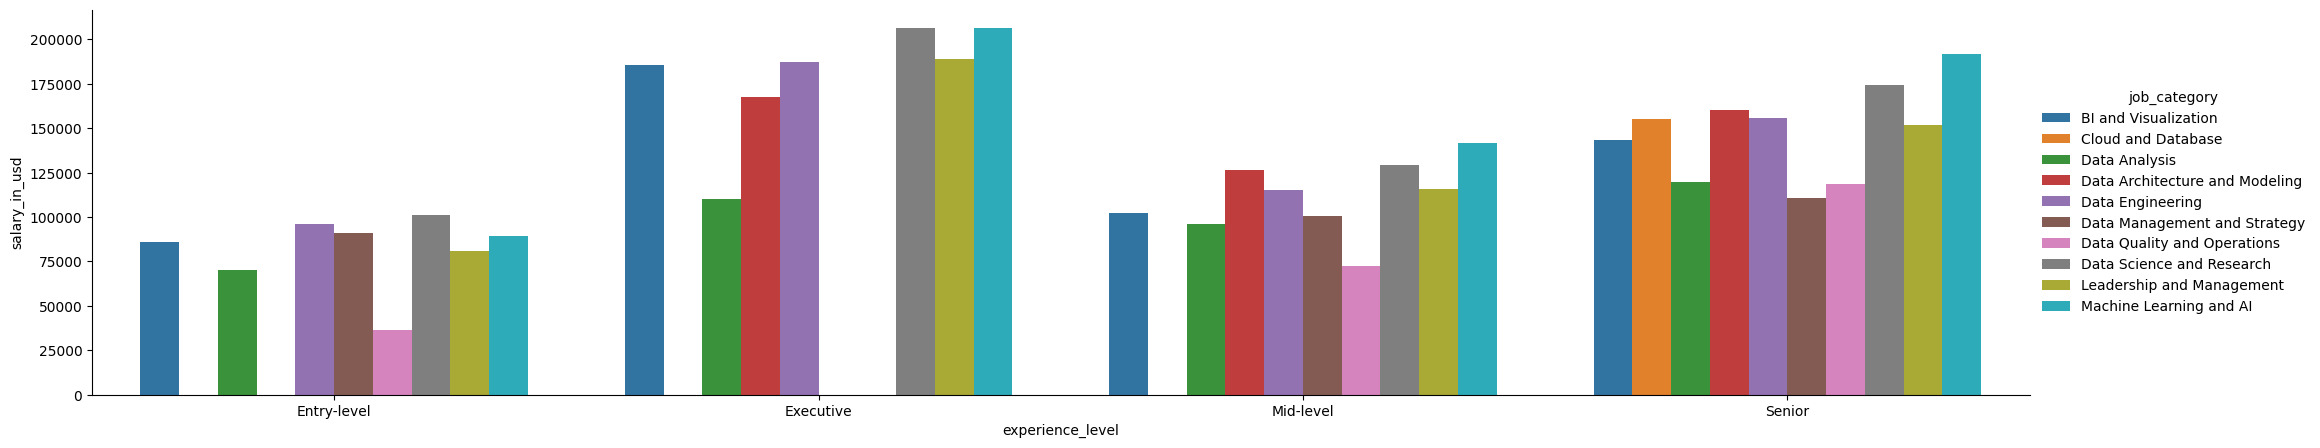

In [25]:
plt.figure(figsize=(25, 5))
ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='job_category', data=df)
ax.spines[['top', 'right']].set_visible(False)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)

In [26]:
# import pandas as pd
# import seaborn as sns
# import numpy as np
# data = pd.DataFrame({'job_title':np.random.choice(['data_science','Data_analysis'],400),
#               'experience_level':np.random.choice(['entry','senior'],400),
#               'salary':np.random.choice((50000),400)})

In [27]:
data.head(1)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [28]:
data.experience_level.value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [29]:
df1 = data[data['experience_level']=='Entry-level']
df2 = data[data['experience_level']=='Mid-level']
df3 = data[data['experience_level']=='Executive']

In [30]:
entry = df1.groupby('job_category')['salary_in_usd'].describe().reset_index()[['job_category','mean']]
mid = df2.groupby('job_category')['salary_in_usd'].describe().reset_index()[['job_category','mean']]
mid


,job_category,mean
0,BI and Visualization,102050.017241
1,Data Analysis,96316.672544
2,Data Architecture and Modeling,126637.875000
3,Data Engineering,115030.658385
4,Data Management and Strategy,100350.000000
5,Data Quality and Operations,72483.750000
6,Data Science and Research,129167.132265
7,Leadership and Management,115544.527132
8,Machine Learning and AI,141944.595745


<Axes: xlabel='mean', ylabel='job_category'>

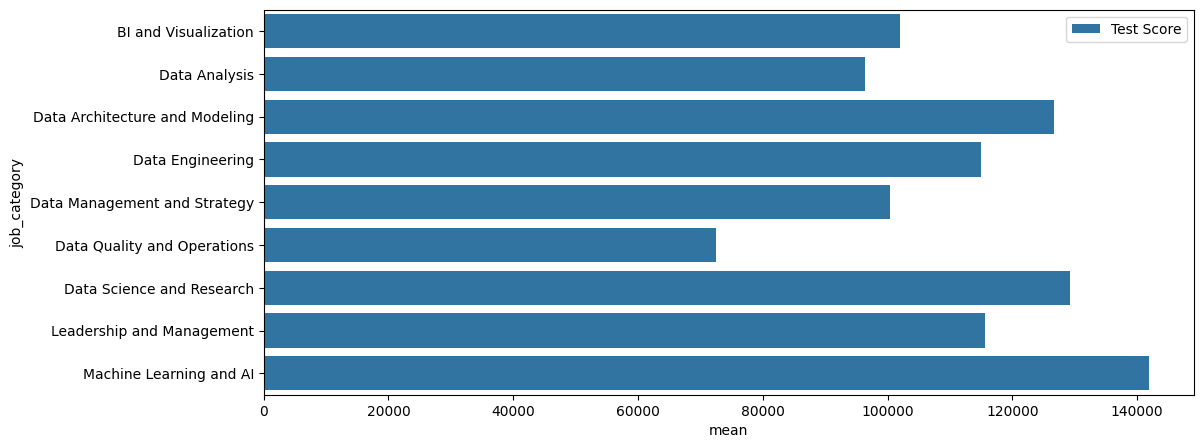

In [31]:
plt.figure(figsize=(12,5))
# sns.barplot(entry, y='job_category',x= 'mean',)
sns.barplot(mid, x='mean', y= 'job_category',label='Test Score')

In [32]:
import plotly.graph_objects as go
count_cat = data.groupby(['work_year','job_category']).size().reset_index(name='size')
count_salary = data.groupby(['work_year','job_category'])['salary_in_usd'].mean().reset_index(name='salary_mean')
count_salary['salary_mean'] = round(count_salary['salary_mean']/1000,2)
count_salary['salary_mean'] = count_salary['salary_mean'].astype('str') + "  "+ "Thousand USD"
grouped_data = pd.merge(count_cat,count_salary,on=['work_year','job_category'])


fig = px.scatter(
    grouped_data,
    x='work_year',
    y='job_category',
    size='size',
    color='job_category',
    hover_name='salary_mean',
    size_max=50,
    width=1100,
    height=600
)
fig.show()

In [34]:
data['employment_type'].value_counts()

employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

####  Basic statistical overview:

* From 2020 to 2023, the year 2023 accounts for 79.7% of the data.
* Senior roles make up 71.7%, Mid-level at 20%, Entry-level at 5.3%, and Executive positions at 3%
* Companies are most commonly located in the United States, which makes up 86.8% of the data.
* Full-time roles constitute 99.5% of the data set. 
* The majority of work, 61%, is done on-site, and remote jobs represent 36.7%.
* Medium-sized companies make up 90% of the data

### Principal Observations and Advice:

* Out of the 10 job categories, the most highly paid data-related jobs are Machine Learning and AI, Data Science and Research, Data Engineering, and Leadership and Management. This insight indicates that while Data Analysts are a good way to start a career in data-related fields, they do not represent the highest paying option.

* Experience Level vs. Salary: There’s a clear relationship between experience and salary, with earnings noticeably growing across all 10 job categories as experience levels increase.

* When it comes to high-paying data jobs, roles in Machine Learning and AI, Data Science and Research, Data Engineering, and Leadership and Management are at the forefront.While Data Analysts may not earn the highest salaries, these positions serve as a stable foundation for a career in data.

* Hybrid work settings tend to have a lower average salary compared to in-person or remote work as shown in the visualization. In-person and remote jobs pay about the same averaging.

* The data underscores that Data Science and Research, Machine Learning and AI, and Data Engineering are careers with bright futures, promising both high earnings and opportunities for advancement. The fulfillment found in these in-demand fields complements their potential for career progression.